In [39]:
import time
import signal
import numpy as np
from naive import *
from type import *
from utils import *
from algorithms import *
from test import *
import random
%reload_ext autoreload
%autoreload 2

### Типы Комбинаторы
Сделующие типы используются как базовые для сборки тестовых типов

In [3]:
for k, v in types.items():
    print(f"{k} = {v}")

top = a -> a
one = (a -> b) -> a -> b
two = ((b -> c) /\ (a -> b)) -> a -> c
three = ((c -> d) /\ (b -> c) /\ (a -> b)) -> a -> d
omega1 = ((a -> b) /\ a) -> b
omega2 = ((a -> (b -> c)) /\ a /\ b) -> c
omega3 = ((b -> c) /\ (a -> b) /\ a) -> c
test1 = a -> (a -> b) -> b
test2 = ((b -> c) /\ a) -> (a -> b) -> c
test3 = ((a -> b -> c) /\ b) -> a -> c
test4 = ((a -> a) -> b) -> b
test5 = (((ω -> b) -> c) /\ ((a -> a) -> b)) -> c
test6 = (((a -> b) -> c) /\ ((ω -> a) -> b)) -> c
kcomb = a -> ω -> a
kastcomb = ω -> a -> a
ccomb = (a -> b -> c) -> b -> a -> c
bcomb = (b -> c) -> (a -> b) -> a -> c
scomb = (a -> c -> d) -> (b -> c) -> (a /\ b) -> d
sscomb = (b -> c -> d) -> ((a -> d -> e) /\ b) -> (a /\ c) -> e
ssscomb = ((a -> b -> f -> g) /\ (c -> d)) -> (a /\ (d -> e -> f) /\ c) -> (b /\ e) -> g
ucomb = (a -> e -> f) -> (b -> d -> e) -> (c -> d) -> (a /\ b /\ c) -> f
diagP = ((a -> b) /\ (c -> d)) -> (a /\ c) -> (b -> d -> e) -> e
zero = ω -> a -> a


## Tests

In [2]:
algos = [naiveComparison, comparePlain, compareSizeCount, compareConstrProp, compareConstrPropSizeCount]
names = ["Перебор переименований", "Сравнение с перебором", "(SZ) Подсчет размеров", "(CP) Распространение ограничений", 
         "(SZ) + (CP)"]


### Depth Test

In [40]:
random.seed(1000)
depths = list(range(1, 50))
constWidth = 3
constVars = 5

def depthTypeGen(d: int):
    return testType(d, constWidth, constVars)

depthResults = speedTest(depths, algos, depthTypeGen)

31it [14:38, 51.69s/it]

timeout of 0 at 32


49it [21:32, 26.38s/it]


In [41]:
np.save("depth-test.npy", depthResults)

### Width Test

In [43]:
random.seed(1000)
widths = list(range(2, 30))
constDepth = 4
constVars = 5

def widthTypeGen(w: int):
    return testType(constDepth, w, constVars)

widthResults = speedTest(widths, algos, widthTypeGen)
np.save("width-test.npy", widthResults)

7it [02:05, 26.84s/it]

timeout of 1 at 9
timeout of 3 at 9


12it [05:29, 43.28s/it]

timeout of 2 at 14


13it [06:03, 40.32s/it]

timeout of 4 at 14


28it [06:49, 14.62s/it]

timeout of 0 at 16


### Many Vars Test

In [47]:
random.seed(1000)
varAmounts = list(range(2, 36, 2))
constDepth = 4

def varsTypeGen(vars: int):
    return manyVariables(constDepth, vars // 2)

varResults = speedTest(varAmounts, algos, varsTypeGen)
np.save("var-test.npy", varResults)

3it [00:11,  5.02s/it]

timeout of 0 at 8


6it [00:32,  8.18s/it]

timeout of 1 at 14
timeout of 2 at 14


17it [00:43,  2.54s/it]


In [6]:
np.save("depth-test.npy", depthResults)
np.save("width-test.npy", widthResults)
np.save("var-test.npy", varResults)

## Графики

In [9]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [127]:
def plot(sample, results, xlabel):
    resultsMean = results.mean(axis=2)
    resultsStd = results.std(axis=2)
    # plt.figure(figsize=(8, 3))

    plt.figure(figsize=(10, 4))
    for i in range(len(results)):
        index = results[i][:, -1] > 0
        x = sample[:len(results[i][index])]
        mean = resultsMean[i][index]
        std = resultsStd[i][index]

        plt.plot(x, mean, label=names[i])
        # plt.fill_between(x, mean + std, mean - std, alpha=0.3)
        # plt.plot(x, mean + std, color="black", linewidth=0.2)
        # plt.plot(x, mean - std, color="black", linewidth=0.2)
        if not np.all(index):
            plt.plot(x[-1], mean[-1], marker="X", color="red", markersize=10)

    plt.grid()
    plt.legend(fontsize=10)
    plt.ylabel("Время, мс.")
    plt.xlabel(xlabel)

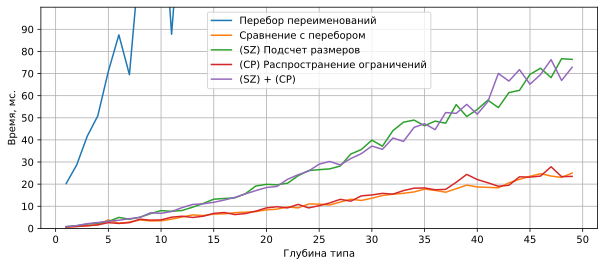

In [128]:
plot(depths, depthResults, "Глубина типа")
plt.ylim(0, 100)
plt.xticks(np.arange(0, 55, 5))
plt.yticks(np.arange(0, 100, 10))
plt.savefig("depth.pdf")
plt.show()

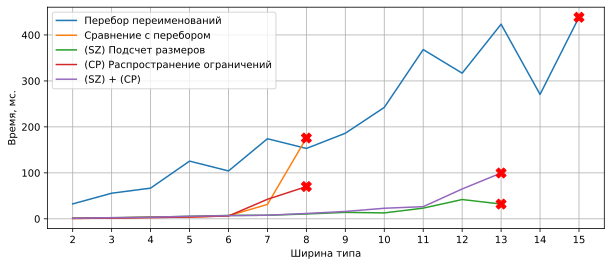

In [129]:
plot(widths, widthResults, "Ширина типа")
plt.xticks(np.arange(2, 16, 1))
plt.show()

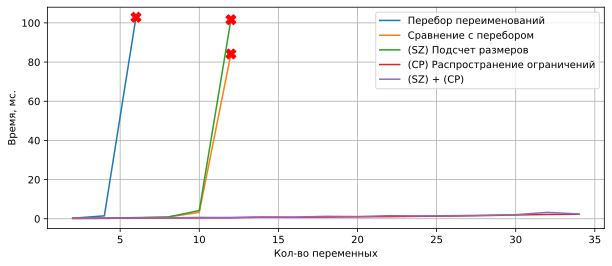

In [130]:
plot(varAmounts, varResults, "Кол-во переменных")
# plt.xticks(np.arange(0, 35, 5))
plt.show()

Special buggy case to check

In [131]:
x = Variable("x")
y = Variable("y")
m = Variable("m")

t = typify([
    (a, [b, x]), (b, x)
])
s = typify([
    (m, [c, y]), (y, c)
])

print(naiveComparison(t, s))
print(comparePlain(t, s))
print(compareSizeCount(t, s))
print(compareConstrProp(t, s))
print(compareConstrPropSizeCount(t, s))

{a -> m, b -> y, x -> c}
{a -> m, b -> y, x -> c}
{a -> m, b -> y, x -> c}
{a -> m, b -> y, x -> c}
{a -> m, b -> y, x -> c}
